In [500]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.stats import ttest_ind

In [501]:
#pwd

In [502]:
#load in dataset
df = pd.read_csv('data\combined.csv', index_col = 0)

In [503]:
df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [504]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39105 entries, 0 to 39104
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    39105 non-null  object
 1   text     39104 non-null  object
 2   subject  39105 non-null  object
 3   date     39105 non-null  object
 4   label    39105 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.8+ MB


In [505]:
#drop single row with no text
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)

Feature Extraction:

In [506]:
#word counts
df['text_wc']=df.text.apply(lambda x: len(x.split()))
df['title_wc'] = df.title.apply(lambda x: len(x.split()))

In [507]:
#character counts
df['text_cc'] = df['text'].str.len().astype(int)
df['title_cc'] = df['title'].str.len()

In [508]:
#average word length
def av_word_len(x):
    words = x.split()
    if len(words) > 0:
        return (sum(len(word) for word in words)/ len(words))
    else:
        return 0
df['av_word_len_text'] = df['text'].apply(av_word_len)
df['av_word_len_title'] = df['title'].apply(av_word_len)


In [509]:
#uppercase word counts
df['upper_text_wc'] = df.text.apply(lambda x: len([x for x in x.split() if x.isupper()]))
df['upper_title_wc'] = df.title.apply(lambda x: len([x for x in x.split() if x.isupper()]))

In [510]:
#numerics count
df['numerics'] = df.text.apply(lambda x: len([x for x in x.split() if x.isdigit()]))

In [511]:
#exclamation mark count
df['exclam'] = df.text.str.count('!')

In [512]:
#question mark count
df['qmark'] = [df.text[i].count('?') for i in range(len(df))]

In [513]:
#period count
df['period'] =[df.text[i].count('.') for i in range(len(df))]

In [514]:
#@ count
df['at'] = df.text.str.count('@')

In [515]:
#stopwords percentage
from nltk.corpus import stopwords
stop = stopwords.words('english')
def stop_p(text):
    words = text.split()
    if len(words) > 0:
        return len([word for word in words if word in stop]) / len(words)
    else:
        return 0 
df['stop%'] = df['text'].apply(lambda x: stop_p(x))

In [516]:
#descriptive stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,39104.0,0.457958,0.498236,0.0,0.000000,0.000000,1.000000,1.000000
text_wc,39104.0,396.662873,314.557359,0.0,207.000000,364.000000,507.000000,8135.000000
title_wc,39104.0,11.954122,3.676347,1.0,9.000000,11.000000,14.000000,42.000000
text_cc,39104.0,2415.401570,1940.539832,1.0,1255.000000,2201.000000,3071.000000,51794.000000
title_cc,39104.0,76.837740,22.282825,8.0,62.000000,71.000000,87.000000,286.000000
av_word_len_text,39104.0,5.079620,1.943200,0.0,4.857506,5.071717,5.270624,149.000000
av_word_len_title,39104.0,5.591023,1.424357,3.0,5.000000,5.500000,6.066667,149.000000
upper_text_wc,39104.0,6.805007,9.422848,0.0,2.000000,4.000000,9.000000,309.000000
upper_title_wc,39104.0,1.538462,2.353555,0.0,0.000000,1.000000,2.000000,24.000000
numerics,39104.0,1.990589,3.064325,0.0,0.000000,1.000000,3.000000,118.000000


Exploratory Data Analysis

In [517]:
fake = df[df.label==1]
true = df[df.label==0]

In [518]:
#percentage of real vs fake articles
df.label.value_counts() / len(df) * 100

0    54.204173
1    45.795827
Name: label, dtype: float64

In [519]:
print(len(fake))
print(len(true))

17908
21196


In [520]:
#randomly smaple real artciles so that there are an equal number of samples in each category
indices = np.random.choice(true.index, 17908)
random_true = true.loc[indices]

In [521]:
#breakdown of subjects by label
df.groupby(['label', 'subject']).label.count()

label  subject        
0      politicsNews       11216
       worldnews           9980
1      Government News      532
       News                9050
       US_News              783
       left-news            705
       politics            6838
Name: label, dtype: int64

In [522]:
#subject not useful for analysis
df.drop('subject', axis=1, inplace=True)

Text(0.5, 1.0, 'Title Character Count Distribution')

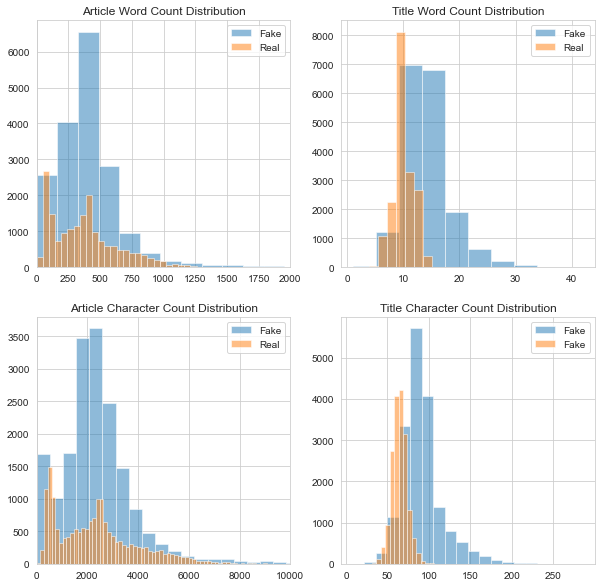

In [523]:
#histograms of character & word counts
sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.hist(fake['text_wc'], alpha=.5, bins=50, label='Fake')
plt.hist(random_true['text_wc'], alpha=.5, bins=50, label='Real')
plt.xlim([0,2000])
plt.legend()
plt.title('Article Word Count Distribution')

plt.subplot(2,2,2)
plt.hist(fake['title_wc'], bins= 10,alpha=.5,label='Fake')
plt.hist(random_true['title_wc'], bins= 10,alpha=.5, label='Real')
plt.legend()
plt.title('Title Word Count Distribution')

plt.subplot(2,2,3)
plt.hist(fake['text_cc'], bins=100, alpha=.5, label='Fake')
plt.hist(random_true['text_cc'], bins=100, alpha=.5, label='Real')
plt.xlim([0,10000])
plt.legend()
plt.title('Article Character Count Distribution')

plt.subplot(2,2,4)
plt.hist(fake['title_cc'], bins=20, alpha=.5, label='Fake')
plt.hist(random_true['title_cc'], bins=20, alpha=.5, label='Fake')
plt.legend()
plt.title('Title Character Count Distribution')

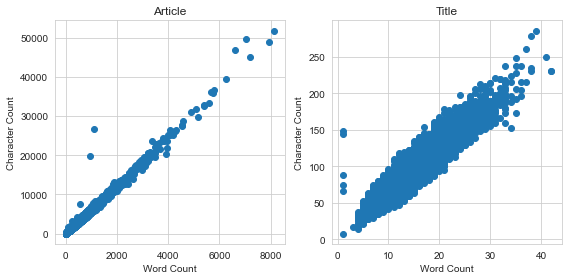

In [524]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.scatter(df.text_wc, df.text_cc)
plt.title('Article')
plt.xlabel('Word Count')
plt.ylabel('Character Count')

plt.subplot(1,2,2)
plt.scatter(df.title_wc, df.title_cc)
plt.title('Title')
plt.xlabel('Word Count')
plt.ylabel('Character Count')

plt.tight_layout()

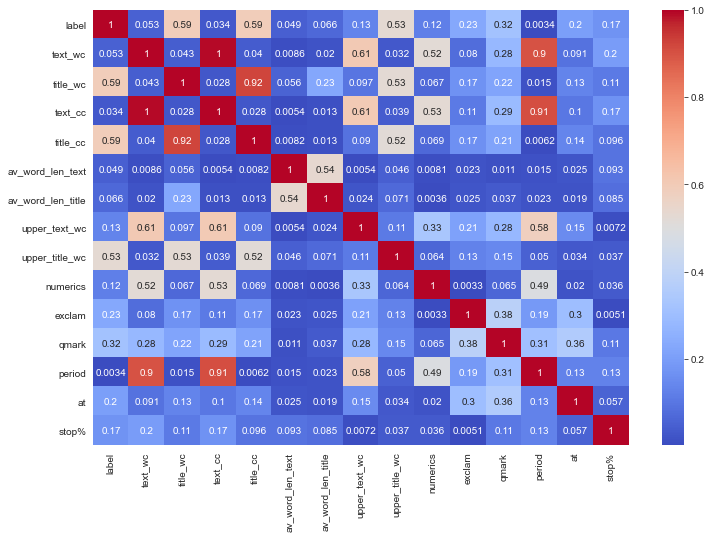

In [525]:
#correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(abs(df.corr()), cmap='coolwarm', annot=True)

In [527]:
#drop repeated information
df.drop(['text_cc', 'title_cc'], axis=1, inplace=True)

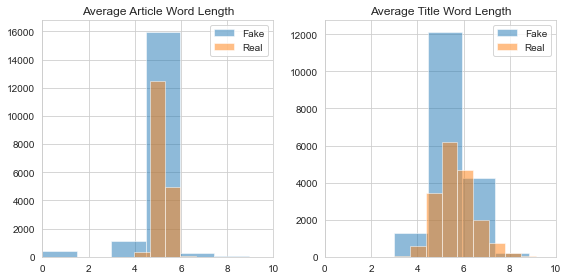

In [528]:
#histograms of average word length
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.hist(fake['av_word_len_text'], bins=100, alpha=.5)
plt.hist(random_true['av_word_len_text'], alpha=.5)
plt.xlim([0,10])
plt.title('Average Article Word Length')
plt.legend(['Fake', 'Real'])

plt.subplot(1,2,2)
plt.hist(fake['av_word_len_title'], bins=100, alpha=.5)
plt.hist(random_true['av_word_len_title'], alpha=.5)
plt.xlim([0,10])
plt.title('Average Title Word Length')
plt.legend(['Fake', 'Real'])

plt.tight_layout()

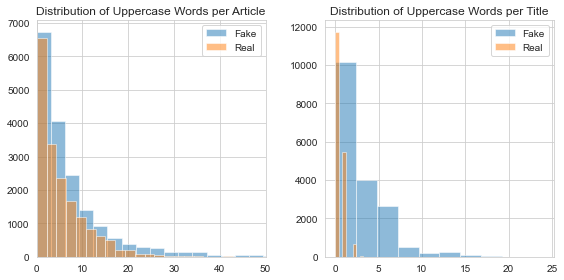

In [529]:
#histograms of uppercase words
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.hist(fake['upper_text_wc'], bins=100, alpha=.5)
plt.hist(random_true['upper_text_wc'], bins=100,alpha=.5)
plt.xlim([0,50])
plt.legend(['Fake', 'Real'])
plt.title('Distribution of Uppercase Words per Article')

plt.subplot(1,2,2)
plt.hist(fake['upper_title_wc'], bins=10, alpha=.5)
plt.hist(random_true['upper_title_wc'], bins=10, alpha=.5)
plt.legend(['Fake', 'Real'])
plt.title('Distribution of Uppercase Words per Title')

plt.tight_layout()

Text(0, 0.5, 'Frequency')

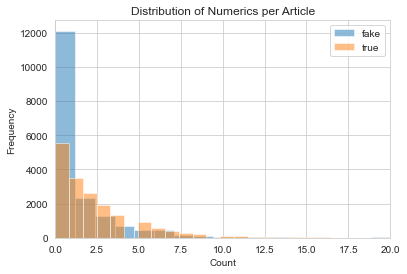

In [530]:
plt.hist(fake.numerics, bins=100, label='fake', alpha=.5)
plt.hist(random_true.numerics, bins=50, label='true', alpha=.5)
plt.xlim([0,20])
plt.legend()
plt.title('Distribution of Numerics per Article')
plt.xlabel('Count')
plt.ylabel('Frequency')

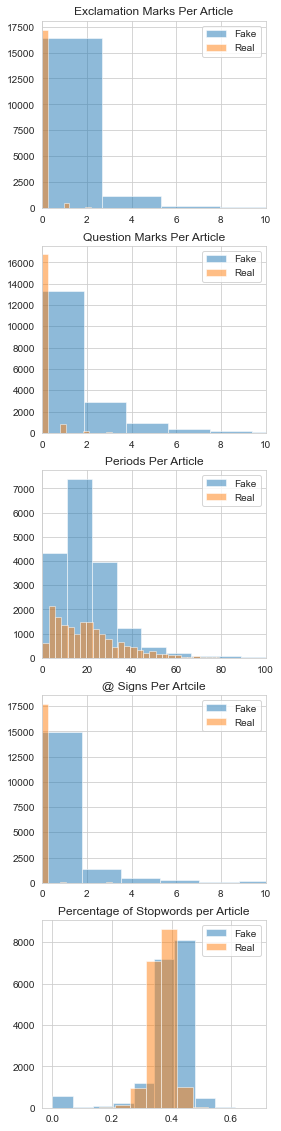

In [531]:
#distribution of punctuation
plt.figure(figsize=(4, 20))
plt.subplot(5,1,1)
plt.hist(fake['exclam'], bins=50, alpha=.5)
plt.hist(random_true['exclam'], bins=50, alpha=.5)
plt.xlim([0,10])
plt.title('Exclamation Marks Per Article')
plt.legend(['Fake', 'Real'])

plt.subplot(5,1,2)
plt.hist(fake['qmark'], bins=50, alpha=.5)
plt.hist(random_true['qmark'], bins=50, alpha=.5)
plt.xlim([0,10])
plt.title('Question Marks Per Article')
plt.legend(['Fake', 'Real'])

plt.subplot(5,1,3)
plt.hist(fake['period'], bins=50, alpha=.5)
plt.hist(random_true['period'],bins=50, alpha=.5)
plt.xlim([0,100])
plt.title('Periods Per Article')
plt.legend(['Fake', 'Real'])

plt.subplot(5,1,4)
plt.hist(fake['at'], bins=50, alpha=.5)
plt.hist(random_true['at'], bins=50, alpha=.5)
plt.xlim([0,10])
plt.title('@ Signs Per Artcile')
plt.legend(['Fake', 'Real'])

plt.subplot(5,1,5)
plt.hist(fake['stop%'], alpha=.5)
plt.hist(random_true['stop%'], alpha=.5)
plt.title('Percentage of Stopwords per Article')
plt.legend(['Fake', 'Real'])

Hypothesis Testing

In [532]:
#feature means grouped by label
df.groupby('label').mean()

,text_wc,title_wc,av_word_len_text,av_word_len_title,upper_text_wc,upper_title_wc,numerics,exclam,qmark,period,at,stop%
label,,,,,,,,,,,,
0,381.431921,9.951217,5.167209,5.677599,5.644839,0.386394,2.336384,0.062134,0.099453,20.895122,0.038073,0.366795
1,414.690306,14.324771,4.975949,5.488551,8.178189,2.902055,1.581304,0.723420,1.202256,20.779484,1.351072,0.389405


In [533]:
#fake articles have longer articles and titles but shorter words
#fake artciles have more upper case words and punctuation
#real articles have more numerics
#fake articles have more stopwords

In [535]:
#perform t_tests for all extracted features
t_tests={}
for i in df.columns[4:]:
    tstat,pval = ttest_ind(random_true[i], fake[i])
    t_tests[i] = [tstat, pval]
t_tests = pd.DataFrame(t_tests, index=['t_stat', 'p_val']).T
t_tests

,t_stat,p_val
text_wc,-9.252740,2.305524e-20
title_wc,-135.472945,0.000000e+00
av_word_len_text,8.826775,1.125148e-18
av_word_len_title,11.388913,5.348647e-30
upper_text_wc,-24.589978,2.034319e-132
upper_title_wc,-114.716735,0.000000e+00
numerics,24.222772,1.391118e-128
exclam,-43.384064,0.000000e+00
qmark,-61.855754,0.000000e+00
period,1.251008,2.109397e-01


In [536]:
#number of periods is not significantly different between Real and Fake Articles
df.drop('period', axis=1, inplace=True)

In [537]:
df

,title,text,date,label,text_wc,title_wc,av_word_len_text,av_word_len_title,upper_text_wc,upper_title_wc,numerics,exclam,qmark,at,stop%
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,"December 31, 2017",1,495,12,4.804040,5.583333,5,0,4,6,9,13,0.375758
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,"December 31, 2017",1,305,8,5.213115,7.625000,3,0,0,0,0,0,0.390164
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...","December 30, 2017",1,580,15,5.168966,5.000000,42,0,0,2,4,14,0.360345
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...","December 29, 2017",1,444,14,5.180180,4.571429,5,1,5,0,1,8,0.360360
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,"December 25, 2017",1,420,11,4.554762,5.363636,0,0,0,0,0,0,0.464286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39099,'Fully committed' NATO backs new U.S. approach...,NATO allies on Tuesday welcomed President Dona...,"August 22, 2017",0,463,9,5.008639,5.888889,14,2,3,0,0,0,0.386609
39100,LexisNexis withdrew two products from Chinese ...,"LexisNexis, a provider of legal, regulatory an...","August 22, 2017",0,122,7,5.336066,6.571429,0,0,0,0,0,0,0.368852
39101,Minsk cultural hub becomes haven from authorities,In the shadow of disused Soviet-era factories ...,"August 22, 2017",0,317,7,5.044164,6.142857,4,0,3,0,0,0,0.400631
39102,Vatican upbeat on possibility of Pope Francis ...,Vatican Secretary of State Cardinal Pietro Par...,"August 22, 2017",0,202,9,4.806931,5.888889,0,0,0,0,0,0,0.400990


In [538]:
df.to_csv('data/added_features.csv')